# AI Lab Assignment 4

# 2. Building a classifier on a real dataset (3.5 points)

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [122]:
df = pd.read_csv("pima.csv", header=0, sep=',')
print(df.shape)
df.head(5)

(768, 9)


,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


**The goal is to predict whether or not a patient has diabetes from the values ​​of some variables. The target variable is "class".**

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Age:** Age (years)
* **Class:** Class variable ("yes" / "no")

In [132]:
feature_names = list(df.columns)
feature_names.remove('class')
print(feature_names)
X = df[feature_names].values
y = df['class'].values

['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin', 'massIndex', 'pedigree', 'age']


**Basic stats for each attribute:**

In [125]:
df.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


**Smoothed histograms of each attribute in each class. Color indicates class ("yes"/"no"):**

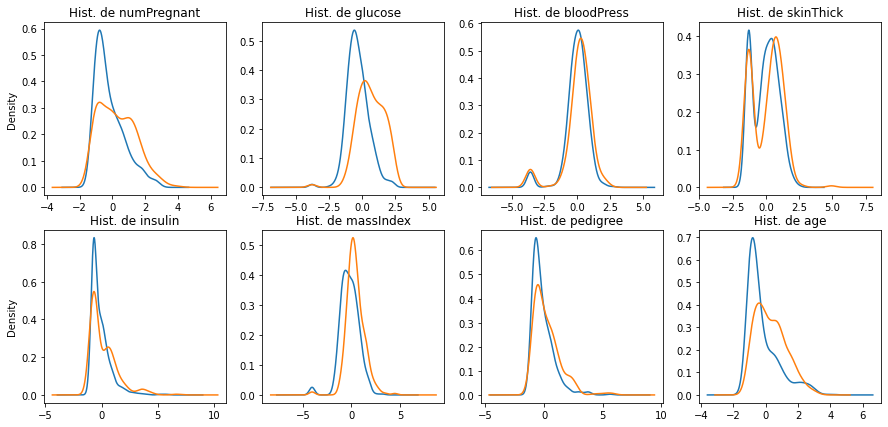

In [126]:
plt.figure(figsize=(15,7))
for i,n in enumerate(feature_names):
    plt.subplot(2,4,i+1)
    aux = 'Density' if i%4==0 else ''
    df.groupby("class")[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux)

## Training a model and testing its quality using 5-fold cross validation

The following cell trains a model and tests it on several different training-test partitions of the data. The result is a mean score with its standard deviation. The type of model (Naïve Bayes / decision tree / knn / logistic regression / neural network) and parameters used must be selected to obtain the best result.

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
# other classifiers (from notebook p4_01)

#clf = DecisionTreeClassifier(max_depth=2)
clf = KNeighborsClassifier(n_neighbors=13) 
#clf = MLPClassifier(hidden_layer_sizes=(10,),
#                              max_iter=1000,
#                              alpha=0)
scores = cross_val_score(clf, X, y, cv=5)
print("All scores: ", scores)
print("Global Model Score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

All scores:  [0.75974026 0.75324675 0.74675325 0.77777778 0.75163399]
Global Model Score: 0.76 +/- 0.01


## Answer the following questions here:

* What is the best score you get with a k-nn and with what k (value of n_neighbours)?
* What is the best score you get with a decision tree and at what maximum depth (value of max_depth)?
* What is the best score you get with a neural network and with what configuration (value of hidden_layer_sizes)?

Note: to answer these questions you just have to change the type of model and its parameters in the previous cell.

**Question 1**

As we can see in the results obtained the best score using a k-nn model is 0.76 +/- 0.04, when there are 13 neighbors. Lower values produce a lower result, and higher values stay at a close value until the number of neighbors rises significantly, where the output starts to lower again. We also realized that  the standard deviation for this value is higher than the average.

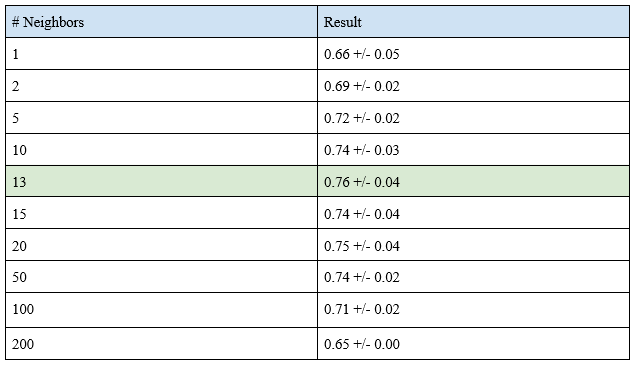

**Question 2**

The highest score for the decision tree model was 0.74 +/- 0.01, for a depth of 2. As it is seen the value for a depth of three is slightly higher, but we decided to discard it because the standard deviation for this result was significantly larger.


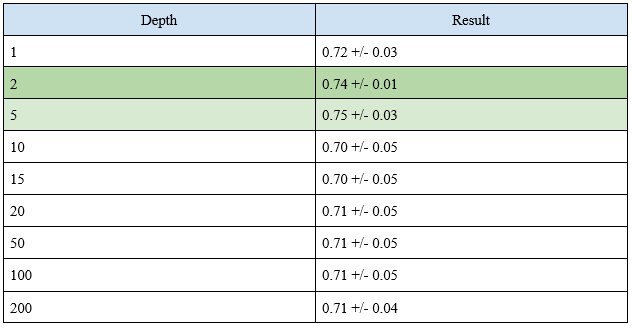

**Question 3**

The best score obtained with the neural network model was 0.69 +/- 0.03, with no hidden layer and 10 neurons. The same result was obtained with a (50,50) architecture, but was discarded because the first option needs less resources.

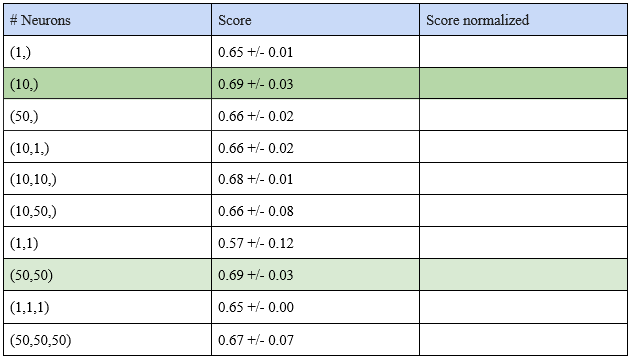

## Improve the model: feature processing and parameter search

Sometimes, instead of using more complex models, it is more useful to spend more time processing the data to get better results.

In this section you will investigate a few approaches for preparing the data which are likely to improve the results: feature construction and selection, feature preprocessing (detection of outliers, missing values, centering and scaling).

Give reasons why you decide to try or ignore any of these methods, and how the results change when you apply them (you can create as many cells as you want).

In [123]:

# include code here
from sklearn import preprocessing
import numpy as np

clase = df.pop('class')
scaler = preprocessing.StandardScaler().fit(df.values)
values = scaler.transform(df.values)
df = pd.DataFrame(values, columns = df.columns)
df.insert(8, 'class', clase)

from sklearn.preprocessing import RobustScaler
clase = df.pop('class')
transformer = RobustScaler().fit(df.values)
values = transformer.transform(X)
df.insert(8, 'class', clase)




**Question 4**

To try to improve data selection we decided to try some new methods of processing data to improve classification results. For feature preprocessing first we discarded any missing values modifications because our data does not have missing values. We implemented a Standard scaler to standardize the input values. The results of this implementation show how the standard deviation get a bit lower on all algorithms, but the most significant improvement was on the score of the neural network model.  Later we implemented a robust scaler to mitigate the effects of the outliers of our data and replace scaling.


Do you think that another configuration of the classifier hyperparameters can solve the problem more efficiently? 
Most likely. 

Now try to change the value of the hyperparameters and return as the final classifier the one that minimizes the estimation of the generalization error. To do this, you have to do two things. The first one is to change the way in which we estimate the generalization error. If we base our results on the error provided by the test, we will overfit the test set. Therefore we must change this estimate. We will estimate the generalization error of each classifier using Nested Cross Validation. 
On the other hand, we will do a grid search of the optimal hyperparameters. We will return the value of the hyperparameters that optimize that error estimate. 

Adapt the code found at https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html to this problem and to the hyperparameter space of one of the classifiers. 
Remember that at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier and at https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier you have information about each of the hyperparameters. You are free to choose the values ​​and hyperparameters to consider. Before configuring the grid, read about each one of the hyperparameters to make sure your search makes sense.

In [136]:
# include code about this section here
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Number of random trials
NUM_TRIALS = 30

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)


    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X, y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

print("All scores: ", nested_scores)
print("Global Model Score: {:.2f} +/- {:.2f}".format(nested_scores.mean(), nested_scores.std()))

All scores:  [0.76953125 0.77213542 0.76822917 0.765625   0.77083333 0.76692708
 0.76953125 0.77083333 0.77213542 0.765625   0.765625   0.765625
 0.77604167 0.77083333 0.75260417 0.75520833 0.77473958 0.77734375
 0.76692708 0.76822917 0.765625   0.77213542 0.76822917 0.76432292
 0.77213542 0.76171875 0.77604167 0.77604167 0.76953125 0.765625  ]
Global Model Score: 0.77 +/- 0.01
